In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
X_train = pd.read_csv('wisdm_train.csv', header = None)
X_test = pd.read_csv('wisdm_test.csv', header = None)
y_train = pd.read_csv('wisdm_train_labels.csv', header = None)
y_test = pd.read_csv('wisdm_test_labels.csv', header = None)

In [29]:
X_mean = np.mean(X_train, axis =0)

In [30]:
X_mean

0      3.617838
1      3.937169
2      3.476803
3      3.529014
4      4.044927
         ...   
496    3.379406
497    3.875626
498    3.700386
499    3.351646
500    3.724060
Length: 501, dtype: float64

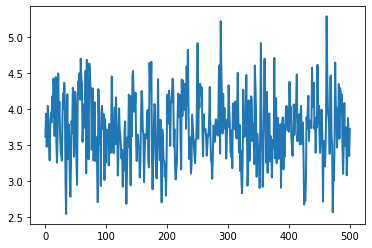

In [31]:
plt.plot(X_mean,linewidth = 2 )

In [32]:
X_mean

0      3.617838
1      3.937169
2      3.476803
3      3.529014
4      4.044927
         ...   
496    3.379406
497    3.875626
498    3.700386
499    3.351646
500    3.724060
Length: 501, dtype: float64

In [33]:
y = np.linspace(0,500, num = 501)


In [34]:
from scipy.interpolate import UnivariateSpline

In [54]:
no_coeffs = []
rss = []
for t in [0.01, 0.02, 0.03, 0.05, 0.1, 0.2,  0.5, 1, 2, 3, 5, 10, 15, 20, 30, 40, 50, 70, 90, 100]:
    spl = UnivariateSpline(y, X_mean, s = t)
    no_coeffs.append(len(spl.get_coeffs()))
    rss.append(spl.get_residual())
    


Text(0, 0.5, 'RSS')

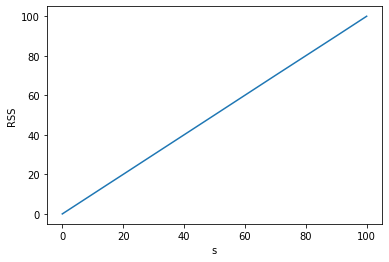

In [60]:
s = [0.01, 0.02, 0.03, 0.05, 0.1, 0.2,  0.5, 1, 2, 3, 5, 10, 15, 20, 30, 40, 50, 70, 90, 100]
plt.plot(s, rss)
plt.xlabel('s')
plt.ylabel('RSS')

"""The optimum lambda is 0.01 with 475 spline coefficients"""

In [10]:
""" b, Using functional PCA for dimension reduction and feature extraction from training data. How many FPC-scores are 
require to explain more 95% of the variance"""

' b, Using functional PCA for dimension reduction and feature extraction from training data. How many FPC-scores are \nrequire to explain more 95% of the variance'

In [11]:
from scipy.interpolate import splrep
knots = np.linspace(0,500,501)
len(knots)

501

In [61]:
"""Bspline to estimate the Spline coefficients"""
beta =[]
for i in range(0,len(X_train)):
    t,c,k =splrep(knots, X_train.iloc[i,:], k =3)
    beta.append(c)

In [63]:
""" BSpline coefficient matrix"""
betaX =np.array(beta)

array([[ 5.77960300e+00,  6.96095736e+00, -2.30195607e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.81378560e+00,  4.70515898e+00,  6.47251714e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.16694640e+00,  2.98003173e+01, -3.32549600e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.02985850e+00, -9.13476465e-01,  5.62066368e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.15759650e+00,  1.74576208e+00, -1.50822749e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.53940630e+00, -2.32595260e-02,  3.38312502e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [65]:
"""PAC on BSpline coefficient matrix """
variance =[]
from sklearn.decomposition import PCA
for i in range (0,65):
    pca = PCA(n_components =i)
    principalComponents = pca.fit_transform(betaX)
    principalDf = pd.DataFrame(data = principalComponents)
    var = pca.explained_variance_ratio_
    variance.append(np.sum(var))

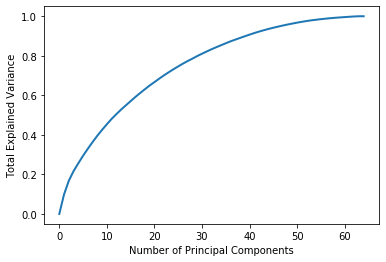

In [74]:
i = np.array(range(0,65))
plt.plot(i, variance, linewidth = 2)
plt.xlabel('Number of Principal Components')
plt.ylabel('Total Explained Variance')
plt.show()

In [84]:
""" 47 FPC-scores are required to explained more 95% of the variances"""

' 47 FPC-scores are required to explained more 95% of the variances'

In [87]:
pca = PCA(n_components =47)
principalComponents = pca.fit_transform(betaX)
principalDf = pd.DataFrame(data = principalComponents)

In [102]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [100]:
X_train = pd.read_csv('wisdm_train.csv', header = None)
X_test = pd.read_csv('wisdm_test.csv', header = None)
y_train = pd.read_csv('wisdm_train_labels.csv', header = None)
y_test = pd.read_csv('wisdm_test_labels.csv', header = None)

In [113]:
enc = OneHotEncoder()
enc.fit(y_train)
y_train_tf = enc.transform(y_train).toarray()

In [112]:
y_test_tf = enc.transform(y_test).toarray()
y_train_tf

<64x2 sparse matrix of type '<class 'numpy.float64'>'
	with 64 stored elements in Compressed Sparse Row format>

In [106]:
beta_test =[]
for i in range(0,len(X_test)):
    t,c,k =splrep(knots, X_test.iloc[i,:], k =3)
    beta_test.append(c)
""" BSpline coefficient matrix"""
betaX_test =np.array(beta_test)
principalComponents_test = pca.transform(betaX_test)
principalDf_test= pd.DataFrame(data = principalComponents_test)

In [119]:
model = RandomForestClassifier(n_estimators = 1000)

In [121]:
model.fit(principalDf, y_train_tf[:,0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [123]:
y_train_pred= model.predict(principalDf)

In [124]:
y_test_pred = model.predict(principalDf_test)

In [128]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [129]:
acc = accuracy_score(y_test_tf[:,0], y_test_pred)

In [131]:
conf = confusion_matrix(y_test_tf[:,0], y_test_pred)

In [133]:
print('Accuracy of Random Forest Classifier is ', acc)
print('Confusion matrix of RFC is ', conf)

Accuracy of Random Forest Classifier is  0.6944444444444444
Confusion matrix of RFC is  [[16  2]
 [ 9  9]]


In [134]:
from sklearn.svm import SVC

In [135]:
svm = SVC()

In [145]:
svm.fit(principalDf, y_train_tf[:,0])

C:\Users\Jack\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [146]:
y_svm_pred = svm.predict(principalDf_test)

In [147]:
acc_svm = accuracy_score(y_test_tf[:,0], y_svm_pred)

In [148]:
conf_svm = confusion_matrix(y_test_tf[:,0], y_svm_pred)

In [149]:
print('Accuracy of Random Forest Classifier is ', acc_svm)
print('Confusion matrix of RFC is ', conf_svm)

Accuracy of Random Forest Classifier is  0.5
Confusion matrix of RFC is  [[18  0]
 [18  0]]


In [150]:
""" Based on performance of Random Forest Classifier and Support Vector Machine, i recommend Random Forest Classifier
with accuracy of 0.7"""

' Based on performance of Random Forest Classifier and Support Vector Machine, i recommend Random Forest Classifier\nwith accuracy of 0.7'